<a href="https://colab.research.google.com/github/rafiafsan/Machine-Learning-Models/blob/main/21225103228_Data_minning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
missing_values = df.isnull().sum()

In [6]:
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [8]:
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
correlation_matrix = df_encoded.corr()['charges'].sort_values(ascending=False)
print(correlation_matrix)

charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


In [14]:
df_encoded.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


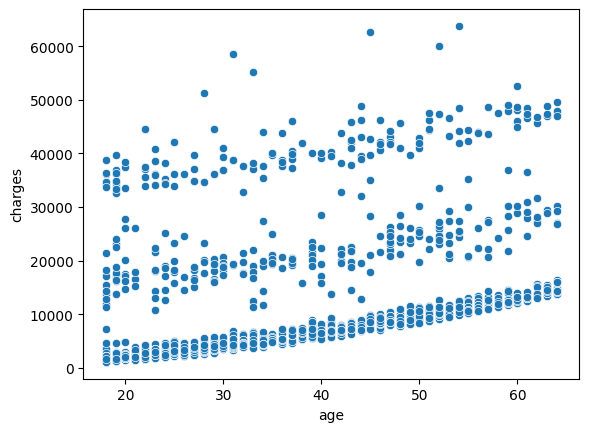

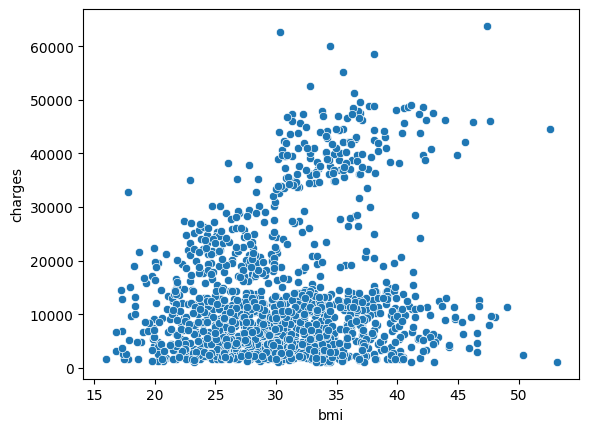

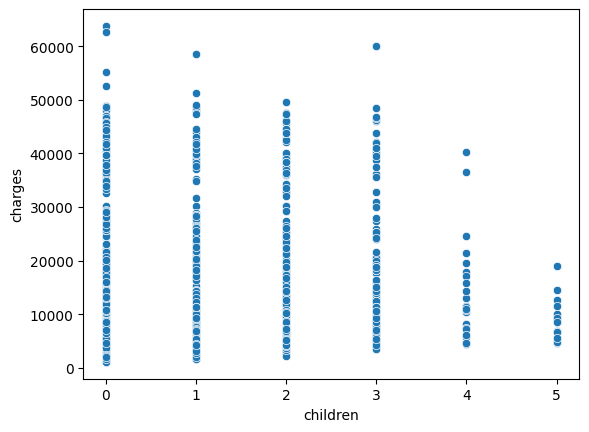

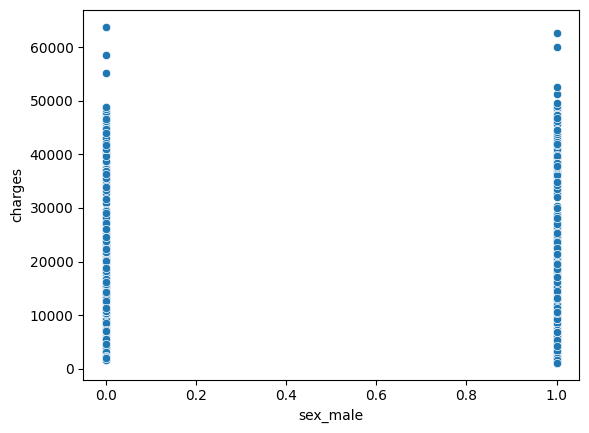

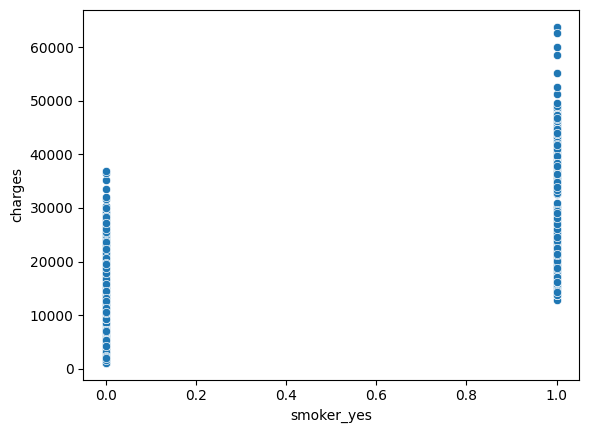

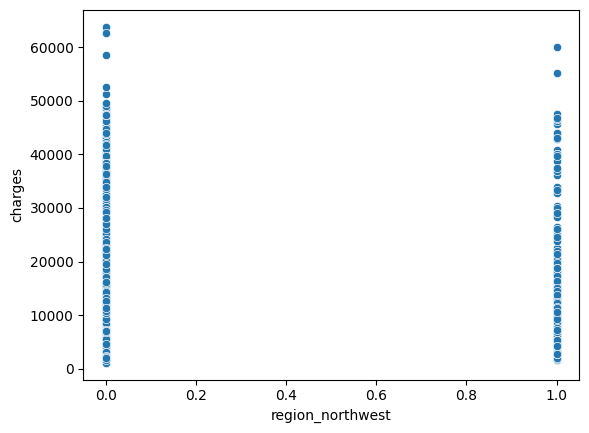

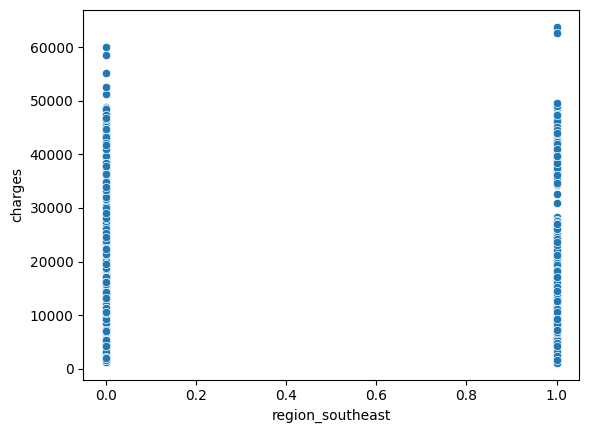

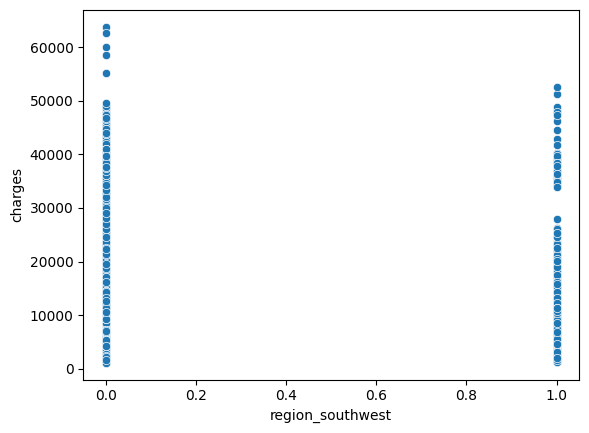

In [18]:
for i in ['age','bmi','children','sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']:
       sns.scatterplot(data=df_encoded,x=i,y='charges')
       plt.show()

In [20]:
a=df_encoded.select_dtypes(include="number").corr()

Text(0.5, 1.0, 'correlation matrix')

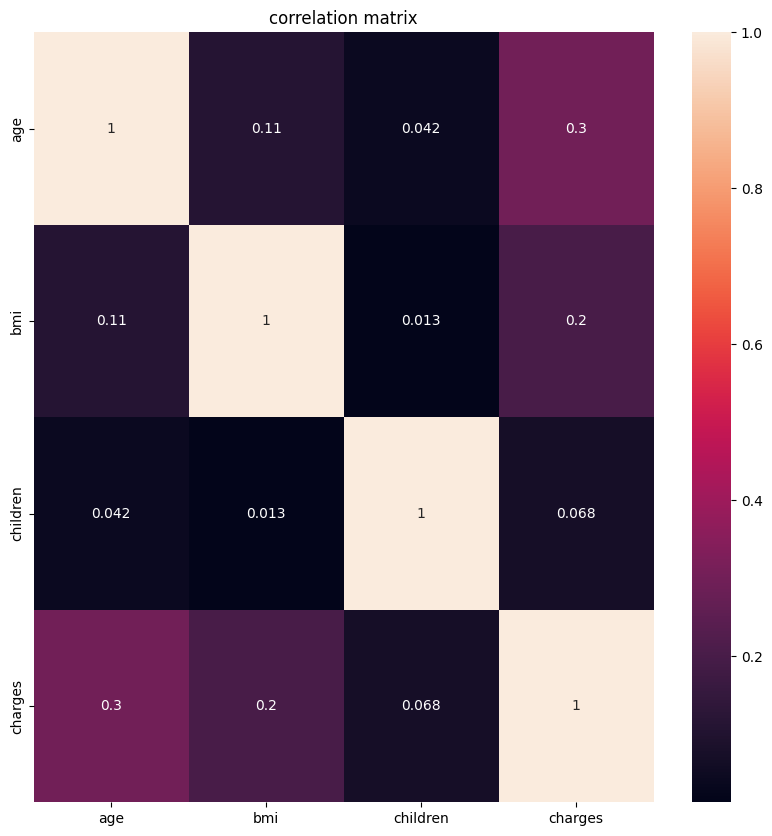

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(a,annot=True).set_title('correlation matrix')

In [22]:
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (e.g., Linear Regression)
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # Create a Linear Regression model
model.fit(X_train, y_train)  # Train the model

# Now you can make predictions
y_pred = model.predict(X_test)

# Create and display the comparison DataFrame
df_comparison = pd.DataFrame({'Actual charges': y_test, 'Predicted charges': y_pred})
print(df_comparison)

      Actual charges  Predicted charges
764       9095.06825        8969.550274
887       5272.17580        7068.747443
890      29330.98315       36858.410912
1293      9301.89355        9454.678501
259      33750.29180       26973.173457
...              ...                ...
109      47055.53210       39061.500932
575      12222.89830       11761.499198
535       6067.12675        7687.563632
543      63770.42801       40920.291512
846       9872.70100       12318.586653

[268 rows x 2 columns]


In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Import mean_absolute_error

In [26]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 33596915.85136145
Mean Absolute Error (MAE): 4181.19447375365
Root Mean Squared Error (RMSE): 5796.284659276273


In [27]:
from sklearn.metrics import mean_absolute_percentage_error

r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 100 * (1 - mape)

r2, accuracy

(0.7835929767120724, 53.111744020853195)

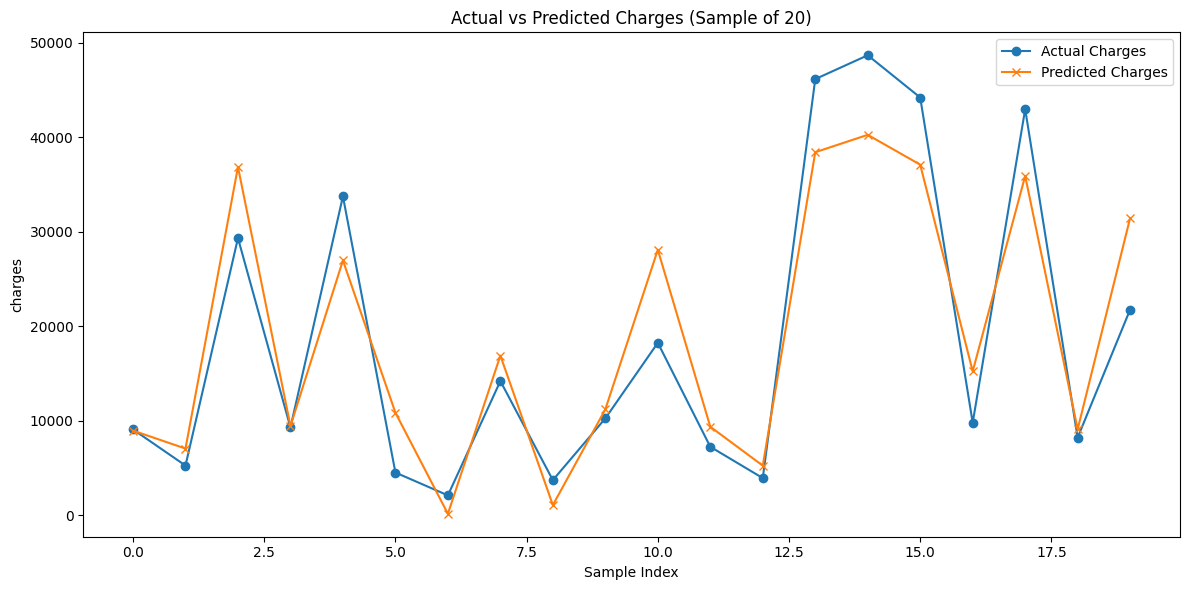

In [28]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred})
comparison_sample = comparison_df.head(20)

# Plot Actual vs Predicted Salaries
plt.figure(figsize=(12, 6))
plt.plot(comparison_sample['Actual Charges'].values, label='Actual Charges', marker='o')
plt.plot(comparison_sample['Predicted Charges'].values, label='Predicted Charges', marker='x')
plt.title('Actual vs Predicted Charges (Sample of 20)')
plt.xlabel('Sample Index')
plt.ylabel('charges')
plt.legend()
plt.tight_layout()
plt.show()